In [10]:
from filterpy.kalman import ExtendedKalmanFilter
import numpy as np
from numpy import eye, array, asarray
from math import sqrt

def HJacobian_at(x):
    """ compute Jacobian of H matrix for state x """

    horiz_dist = x[0]
    altitude   = x[2]
    denom = sqrt(horiz_dist**2 + altitude**2)
    return array ([[horiz_dist/denom, 0., altitude/denom]])

def hx(x):
    """ compute measurement for slant range that would correspond 
    to state x.
    """
    
    return (x[0]**2 + x[2]**2) ** 0.5

In [11]:
from numpy.random import randn
import math

class RadarSim(object):
    """ Simulates the radar signal returns from an object flying 
    at a constant altityude and velocity in 1D. 
    """
    
    def __init__(self, dt, pos, vel, alt):
        self.pos = pos
        self.vel = vel
        self.alt = alt
        self.dt = dt
        
    def get_range(self):
        """ Returns slant range to the object. Call once for each
        new measurement at dt time from last call.
        """
        
        # add some process noise to the system
        self.vel = self.vel  + .1*randn()
        self.alt = self.alt + .1*randn()
        self.pos = self.pos + self.vel*self.dt
    
        # add measurement noise
        err = self.pos * 0.05*randn()
        slant_dist = math.sqrt(self.pos**2 + self.alt**2)
        
        return slant_dist + err

H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (1, 3)
PHT shape: (3, 1)
S shape: (1, 1)
K shape: (3, 1)
y shape: (1,)
K*y shape: (3,)
x shape: (3,)
H shape: (

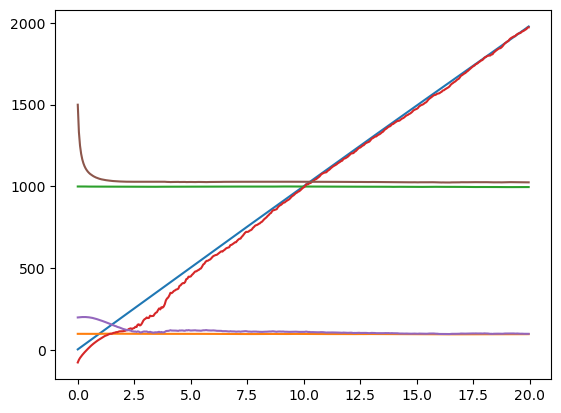

In [12]:
import matplotlib.pyplot as plt 

dt = 0.05
rk = ExtendedKalmanFilter(dim_x=3, dim_z=1)
radar = RadarSim(dt, pos=0., vel=100., alt=1000.)

# make an imperfect starting guess
rk.x = array([radar.pos-100, radar.vel+100, radar.alt+1000])


rk.F = eye(3) + array([[0, 1, 0],
                       [0, 0, 0],
                       [0, 0, 0]])*dt

rk.R = radar.alt * 0.05 # 5% of distance
rk.Q = array([[0, 0, 0],
              [0, 1, 0],
              [0, 0, 1]]) * 0.001
rk.P *= 50

xs = []
track = []
for i in range(int(20/dt)):
    z = radar.get_range()
    track.append((radar.pos, radar.vel, radar.alt))
    
    rk.update(array([z]), HJacobian_at, hx)
    xs.append(rk.x)
    rk.predict()

xs = asarray(xs)
track = asarray(track)
time = np.arange(0, len(xs)*dt, dt)

plt.plot(time, track)
plt.plot(time, xs)